<p style="text-align: center;font-size: 60px;">Stars</p>
<br\><br\>
PLAsTiCC Astronomical Classification<br/>
https://www.kaggle.com/c/PLAsTiCC-2018

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1. Load Training Metatata

In [0]:
# tm: train_metadata
TM = pd.read_csv('./all/training_set_metadata.csv')
print("Size:", TM.shape[0])
TM.sort_values(by=['object_id'], ascending=True).head(3)

Size: 7848


,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42


# 2. Modify column property and Remove unused column
* Change datatype into categorical data for column['DDF', 'target']
* Remove unused cloumn['hostgal_specz']

In [0]:
TM['ddf'] = TM['ddf'].astype('category')
TM['target'] = TM['target'].astype('category')
TM.drop(['hostgal_specz'], axis=1, inplace=True)
TM.sort_values(by=['object_id'], ascending=True).head(3)

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2262,0.0157,40.2561,0.021,42


# 3. Describe data
* Categorical data: (unique/top/freq)
* Numerical data: the rest

#### Column description
0. $ra$: right ascension, sky coordinate: co-longitude in degrees.
0. $decl$: declination, sky coordinate: co-latitude in degrees.
0. $gal\_l$: galactic longitude in degrees.
0. $gal\_b$: galactic latitude in degrees.
0. $ddf(category)$: A flag to identify the object as coming from the DDF survey area (with value DDF = 1 for the DDF, DDF = 0 for the WFD survey).
0. $hostgal\_photoz$: The photometric redshift of the host galaxy of the astronomical source.
0. $hostgal\_photoz\_err$: The uncertainty on the hostgal_photoz based on LSST survey projections.
0. $distmod$: The distance to the source calculated from hostgal_photoz and using general relativity.

0. $mwebv$: MW E(B-V). this ‘extinction’ of light is a property of the Milky Way (MW) dust along the line of sight to the astronomical source, and is thus a function of the sky coordinates of the source ra, decl. This is used to determine a passband dependent dimming and redenning of light from astronomical sources, and based on the Schlafly dust models. Float32

0. $target(category)$: The class of the astronomical source.

In [0]:
TM.describe(include='all')
# First 3 rows for categorical data, the rest rows are for numerical data

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
count,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.0,7848.000000,7848.000000,5523.000000,7848.000000,7848.0
unique,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,14.0
top,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,90.0
freq,NaN,NaN,NaN,NaN,NaN,5732.0,NaN,NaN,NaN,NaN,2313.0
mean,4.810375e+07,169.719379,-27.254846,230.466784,-20.115526,NaN,0.357885,0.155695,41.263961,0.081953,NaN
std,4.347364e+07,114.212761,20.248556,97.416392,40.390899,NaN,0.545552,0.300367,2.262711,0.150598,NaN
min,6.150000e+02,0.175781,-64.760857,0.107681,-89.615573,NaN,0.000000,0.000000,31.996100,0.003000,NaN
25%,3.180865e+05,62.402344,-44.597992,207.248509,-54.509752,NaN,0.000000,0.000000,39.845250,0.018000,NaN
50%,4.131719e+07,150.996094,-27.279613,244.127187,-30.217582,NaN,0.210300,0.018000,41.167900,0.032000,NaN
75%,8.665901e+07,282.875976,-8.838267,313.224277,16.913859,NaN,0.431200,0.122375,42.398550,0.076000,NaN


# 4. Explore the data with plots

In [0]:
TM.head(3)

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2262,0.0157,40.2561,0.021,42


## 4-1 How does the distribution of position look like in the sky?

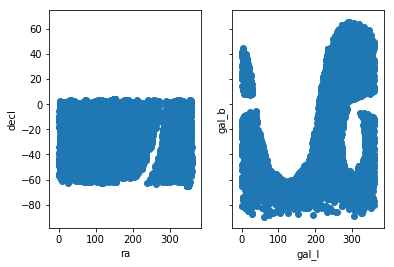

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) # (row, col) = (1, 2)

ax1.set_xlabel('ra'), ax1.set_ylabel('decl')
ax1.scatter(TM.ra, TM.decl)

ax2.set_xlabel('gal_l'), ax2.set_ylabel('gal_b')
ax2.scatter(TM.gal_l, TM.gal_b)

## 4-2 How many targets are there, and how does the distribution of position look like for each target?

In [0]:
targets = sorted(list(TM.target.unique()))
print('size:', len(targets))
print('list:', targets)

size: 14
list: [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]


<span style="color:blue">
Finding:<br/>
There are 14 target classes, and the class names are listed above.
</span>

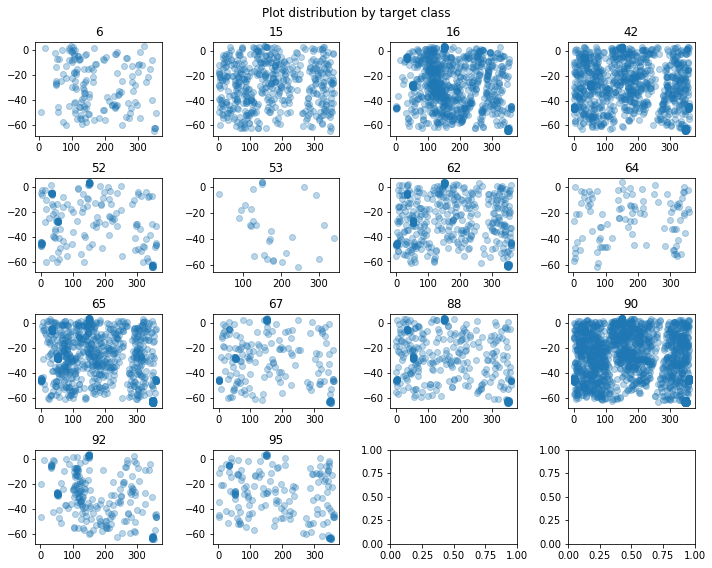

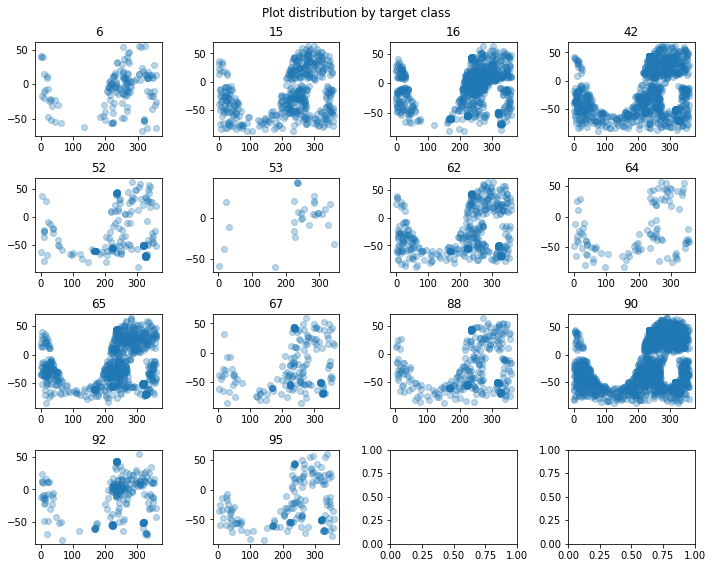

In [0]:
# plot the distribution
def plot_position(df, targets, using_sky_coordinate=True):
    '''plot the position distribution in the sky for each target seperately'''
    
    # 1. auto get the appropriate (row, col) value for the plot area
    block_size = 0
    while block_size * block_size < len(targets):
        block_size += 1
        
    # 2. creat subplots using size and set the canvas
    fig, axes = plt.subplots(block_size, block_size) #(row, col)
    fig.set_size_inches(10, 8, forward=True)
    fig.suptitle('Plot distribution by target class')
    
    # 3. Plot each target class seperately into different subplot area using axes[rol, col]
    row, col = 0, 0
    for target in targets:
        targetDF = df[df.target==target]
        if col < block_size:
            axes[row, col].set_title(str(target))
            
            if using_sky_coordinate:
                axes[row, col].scatter(x=targetDF.ra, y=targetDF.decl, alpha=0.3)
            else:
                axes[row, col].scatter(x=targetDF.gal_l, y=targetDF.gal_b, alpha=0.3)
            
            col += 1
            if col == block_size:
                row += 1
                col = 0
                
    # 4. Layout setting, fig.subplots_adjust helps to avoiding overlapping between main title and sub title
    plt.tight_layout()
    fig.subplots_adjust(top=0.92)
    
plot_position(TM, targets)
plot_position(TM, targets, False)

<span style="color:blue">
Finding:<br/>
Distribution of position shows that objects of each single target class are spread across the universe widely. Position may not be a helpful feature while doing classification.
</span>

## 4-3 According to data discription, objects can be described as: *Galactic / Extra-Galactic* based on the value of redshift (0 is in galaxy) Can you show that?

*photometric redshift is represented in hostgal_photoz column* <br>
Galactic vs extragalactic: The given redshift for objects in our own galaxy is given as zero

* Can you tell a target class is in galactic or extra-galactic?
* Is the (class)-(galactic type) relationship consistent across whole dataset?

In [0]:
TM_copy = TM.copy()
TM_copy['galactic'] = (pd.isnull(TM_copy.hostgal_photoz) | TM_copy.hostgal_photoz == 0)

groupedDF = TM_copy.groupby(['target', 'galactic']).size().to_frame('count').reset_index()
groupedDF

,target,galactic,count
0,6,True,151
1,15,False,495
2,16,True,924
3,42,False,1193
4,52,False,183
5,53,True,30
6,62,False,484
7,64,False,102
8,65,True,981
9,67,False,208


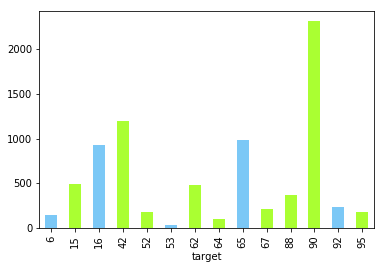

In [0]:
colors = [np.where(groupedDF['galactic'], 'xkcd:lightblue', 'xkcd:lime')]
groupedDF.plot.bar(x='target', y='count', color=colors, legend=False)

In [0]:
# seperate data into sub group for further analysis
df_Galactic = TM_copy[TM_copy.galactic]
df_ExtraGalactic = TM_copy[~TM_copy.galactic]
print('Galactic:', sorted(list(df_Galactic.target.unique())))
print('Extra-Galactic:', sorted(list(df_ExtraGalactic.target.unique())))

Galactic: [6, 16, 53, 65, 92]
Extra-Galactic: [15, 42, 52, 62, 64, 67, 88, 90, 95]


<span style="color:blue">
Finding:<br/>
In training set, whether a target calss is galactic is consistnet across entire dataset. For example, target calss 6 has 151 objects, and they are all identified as extra-galacticc. To sum up, 9 classes out of 14 classes is galactic, while the rest 5 class is extra-galactic.
</span>

## 4-4 Explore numerical attributes for each class with simple statistics. See if there exist any trend or pattern.

In [0]:
def plot_statistic(df, df_name, groupby_column, analysis_columns):
    for column in analysis_columns:
        df.boxplot(column=column, by=groupby_column, figsize=(8,6))
        plt.title(""), plt.suptitle("%s - %s" % (df_name, column))
        plt.show()

### 4-4-1 Statistical analysis on galactic group

In [0]:
df_Galactic.head(3)

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,galactic
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0,0.0,NaN,0.017,92,True
5,1227,35.683594,-5.379379,171.992947,-59.253501,1,0.0,0.0,NaN,0.020,65,True
9,1926,149.414062,1.940072,236.565366,41.393323,1,0.0,0.0,NaN,0.018,65,True


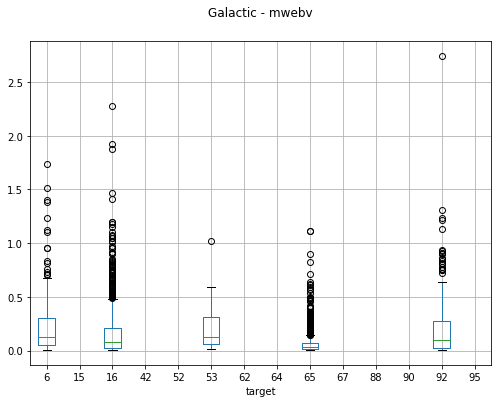

In [0]:
analysis_columns = ['mwebv']
plot_statistic(df=df_Galactic, df_name='Galactic', groupby_column='target', analysis_columns=analysis_columns)

### 4-4-2 Statistical analysis on extra - galactic group

In [0]:
df_ExtraGalactic.head(3)

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,galactic
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.6267,0.2552,45.4063,0.007,88,False
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2262,0.0157,40.2561,0.021,42,False
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.2813,1.1523,40.7951,0.007,90,False


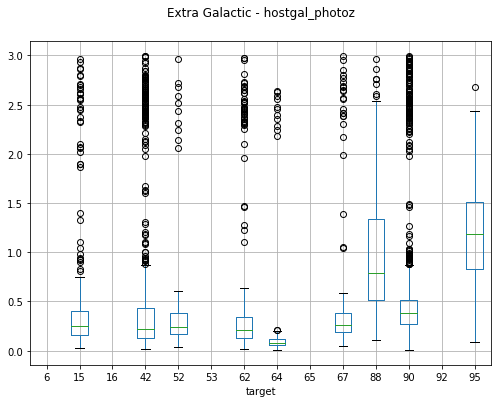

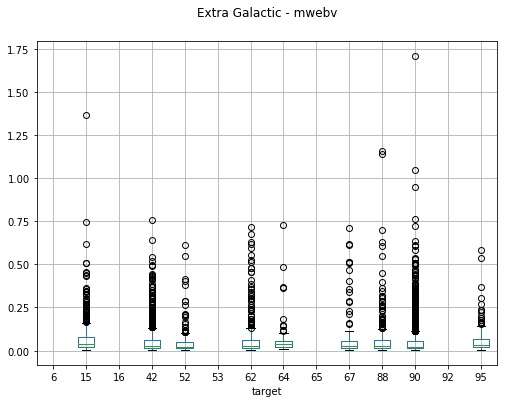

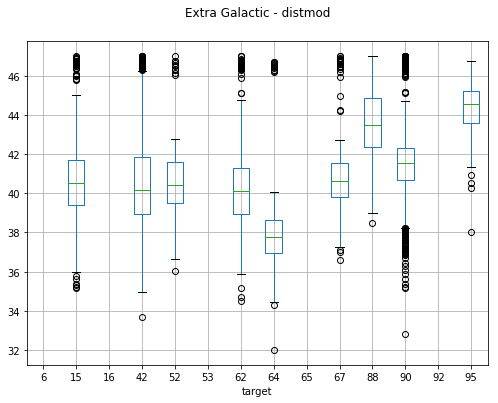

In [0]:
analysis_columns = ['hostgal_photoz','mwebv','distmod']
plot_statistic(df=df_ExtraGalactic, df_name='Extra Galactic', groupby_column='target', analysis_columns=analysis_columns)

<span style="color:blue">
Finding:<br/>
According to the statistical figures above, the distribution of an attribute value among different target classes are overlapped, so there is no direct indicator for classification.<br\>
However, if a object is labeled as extra-galactic and it has distmod >= 42, it has higher chance to be in class 88 and 95. On the other hand, if a object has distmod <= 40, it has higher chance to be in class 64.
</span>